In [108]:
import random
import numpy as np
import nibabel as nib
from matplotlib import pyplot as plt
from scipy.ndimage import rotate, shift, zoom

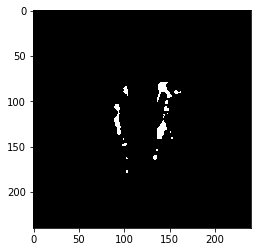

In [109]:
img_path = '../data/wmh-adni/50/pre/FLAIR.nii.gz'
mask_path = '../data/wmh-adni/0/wmh.nii.gz'

x = nib.load(img_path).get_fdata()
x = np.fliplr(x.T)
x[x == 2] = 0
# plt.imshow(x[24], cmap='gray')

y = nib.load(mask_path).get_fdata()
y = np.fliplr(y.T)
y[y == 2] = 0
plt.imshow(y[35], cmap='gray')

In [110]:
def augmentator(x, y, mode):
    rotate_values = [0, 3, 6, 9]
    shif_values = [0, 0.1, 0.2, 0.3]
    
    rotate_range = rotate_values[mode]
    shift_range = rotate_values[mode]

    random_rotate = random.uniform(-rotate_range, rotate_range)
    random_shift = random.uniform(-shift_range, shift_range)
    shift_px = round(x.shape[0] * random_shift)

    x = rotate(x, random_rotate, order=0, reshape=False)
    y = rotate(y, random_rotate, order=0, reshape=False)

    x = shift(x, (shift_px, 0), order=0)
    y = shift(y, (shift_px, 0), order=0)

    return x, y

In [111]:
batch_x, batch_y = x[16:24], y[16:24]

batch_x, batch_y = zip(*[augmentator(x, y, 2) for x, y in zip(batch_x, batch_y)])

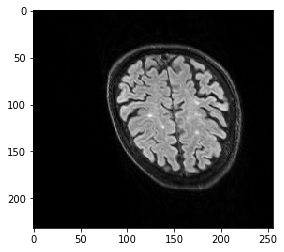

In [148]:
from skimage import transform as tf

img = x[35]

afine_tf = tf.AffineTransform(shear=0.2)
img = tf.warp(img, inverse_map=afine_tf)
# img = (img > 0.5).astype(np.uint8)

rotate_range = 0
shift_range = 0
zoom_range = 0

random_rotate = random.uniform(-rotate_range, rotate_range)
random_shift = random.uniform(-shift_range, shift_range)
shift_px = round(x.shape[1] * random_shift)

img = rotate(img, random_rotate, order=0, reshape=False)
img = shift(img, (shift_px, shift_px), order=0)
# img = zoom(img, zoom_range, order=0)
plt.imshow(img, cmap='gray')